# Task 1: Data Preparation

You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.

Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately.



## Data Preperation :

Before we can begin we must clean up the dataset to get it into a compatible format for the regression model. This involves removing invalid rows, one-hot-encoding categorical variables and converting to appropriate data types.

### Importing Libraries and the Dataset :

Before we can do any processing with the dataset we must import the necesary libraries we will be using.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
NBA_players_p="NBA_players_stats.csv"

###### We then import the dataset as the variable `df`. We use the Pandas library to read in the CSV file.


In [3]:
# Loading the data from the file NBA_players_stats.csv using pandas library
df = pd.read_csv(NBA_players_p,skipinitialspace=True)


# To verify that the dataset has been imported as needed we display a random sample:
df.sample(10, random_state=23)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
432,415,Chris Silva,PF,24,MIA,6,0,53,6,9,0.667,1,1,1.000,5,8,0.625,10,12,0.833,7,11,18,6,1,2,8,14,23
433,416,Ben Simmons,PG,24,PHI,31,31,1051,192,332,0.578,2,7,0.286,190,325,0.585,112,167,0.671,54,191,245,236,49,22,104,96,498
352,343,Royce O'Neale,SF,27,UTA,36,36,1181,94,213,0.441,62,151,0.411,32,62,0.516,23,28,0.821,45,199,244,94,28,20,42,102,273
314,305,Jordan McLaughlin,PG,24,MIN,24,0,467,53,141,0.376,16,46,0.348,37,95,0.389,8,10,0.800,13,43,56,113,24,4,26,24,130
156,155,Marc Gasol,C,36,LAL,35,35,703,54,134,0.403,31,85,0.365,23,49,0.469,29,36,0.806,25,118,143,69,17,45,30,82,168
179,178,Tyrese Haliburton,PG,20,SAC,30,2,903,153,310,0.494,71,164,0.433,82,146,0.562,20,24,0.833,29,78,107,161,42,18,46,36,397
415,399,Derrick Rose,PG,32,DET,15,0,342,79,184,0.429,13,39,0.333,66,145,0.455,42,50,0.840,6,23,29,63,18,4,29,17,213
267,260,Jalen Lecque,PG,20,IND,3,0,9,1,4,0.250,0,1,0.000,1,3,0.333,3,3,1.000,1,3,4,2,0,0,0,0,5
151,150,Wenyen Gabriel,PF,23,NOP,4,0,12,0,3,0.000,0,1,0.000,0,2,0.000,0,0,NaN,1,4,5,1,0,0,0,0,0
395,380,Payton Pritchard,SG,23,BOS,30,1,641,86,188,0.457,41,102,0.402,45,86,0.523,17,18,0.944,16,54,70,69,18,5,34,59,230


In [4]:
#data types of the attributes
df.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object

In [5]:
#column names
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

### Data Cleanup
#### Removing Invalid Rows
The first step in data preparation is to remove any invalid rows from the dataset. We begin by first checking how many empty values exist in the dataset.

### Before we actually start with the data cleaning we keep a copy of the original data set i.e., the raw data provided to us.

In [6]:
#Creating copy of original data
df_copy = df.copy()
df_copy.shape, df.shape

((512, 29), (512, 29))

In [7]:
print("Number of missing values by feature:")
#(df.isnull().sum()/df.shape[0])*100
print(df.isnull().sum())


Number of missing values by feature:
Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        3
3P         0
3PA        0
3P%       33
2P         0
2PA        0
2P%        7
FT         0
FTA        0
FT%       32
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64


In [8]:
#verify the copied data by displaying it

df_copy

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,0.579,0,0,NaN,84,145,0.579,44,81,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125,0,2,0.000,1,6,0.167,0,0,NaN,0,3,3,2,0,0,0,1,20000
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,0.615,0,1,0.000,115,186,0.618,35,79,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,0.563,2,6,0.050,234,413,0.567,160,189,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,0.464,27,75,0.360,88,173,0.509,31,37,0.838,17,77,94,36,8,18,20,36,28800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,488,Delon Wright,SG,28,DET,29,24,848,110,235,0.468,28,73,0.384,82,162,0.506,62,79,0.785,32,101,133,141,42,15,35,32,310
508,489,Thaddeus Young,PF,32,CHI,30,0,760,167,274,0.609,5,22,0.227,162,252,0.643,23,46,0.500,71,105,176,131,42,17,56,81,362
509,490,Trae Young,PG,22,ATL,34,34,1182,262,610,0.430,85,225,0.378,177,385,0.460,288,328,0.878,25,117,142,321,30,8,149,70,897
510,491,Cody Zeller,C,28,CHO,18,15,421,73,142,0.514,3,19,0.158,70,123,0.569,25,33,0.758,46,90,136,44,11,11,20,47,174


In [9]:
#Re-aranging players column at index 0 to avoid it to be considered as numerical or categorical variable.
cols = list(df.columns)
cols = cols[1::2] + cols[::2]
df_copy = df_copy[cols]
df_copy.shape

(512, 29)

In [10]:
df_copy = df_copy.iloc[:,1:]
categorical_column_names = df_copy.columns[df_copy.dtypes==object].tolist()
categorical_column_names

['Pos', 'Tm']

In [11]:
# For the categorical features we simply display the unique values in each field.
# This will pick up any odd categories or mispellings.
for name in categorical_column_names:
    print("\nUnique values in " + name)
    print(df_copy[name].unique())   

# To check the numeric features we ensure that none of the values are negative.
# None of the numeric features of our dataset are valid if they are negative.
for name in df_copy.columns:
    if name not in categorical_column_names:
        print("\nNumber of negative values in " + name)
        print(len(df_copy[df_copy[name] < 0]))

print("\nNumber of negative values in Rank\n",format((df_copy['Rk'].values<0).sum()))


Unique values in Pos
['PF' 'PG' 'C' 'SG' 'SG ' 'SF' 'SGa' 'SF.' 'PFa' 'PF ' 'C ' 'PG-SG ' 'sg'
 'Sf' 'SF-PF' 'pg' 'Pg']

Unique values in Tm
['MIA' 'MIL' 'NOP' 'SAS ' 'PHO' 'MEM' 'TOT' 'BRK ' 'CLE' 'ORL' 'LAL' 'POR'
 'TOR' 'CHI' 'WAS' 'UTA' 'SAC' 'CHO' 'NYK' 'DEN' 'SAS' 'LAC' 'GSW' 'OKC'
 'MIN' 'DET' 'DAL' 'IND' 'ATL' 'PHI' 'BRK' 'BOS' 'HOU' 'OKC ' 'DET '
 'MIL ' 'ORL ' 'CLE ' 'H0U' 'NyK' 'MIA ' 'IND ' 'GSW ' 'MEM ']

Number of negative values in Age
1

Number of negative values in G
0

Number of negative values in MP
0

Number of negative values in FGA
0

Number of negative values in 3P
0

Number of negative values in 3P%
0

Number of negative values in 2PA
0

Number of negative values in FT
0

Number of negative values in FT%
0

Number of negative values in DRB
0

Number of negative values in AST
0

Number of negative values in BLK
0

Number of negative values in PF
0

Number of negative values in Rk
0

Number of negative values in GS
0

Number of negative values in FG
0

Number of 

In [12]:
#Fixing negative values in numerical variables 
df_copy[df_copy.columns[df_copy.dtypes != np.object]] = df_copy[df_copy.columns[df_copy.dtypes != np.object]].abs()

for name in df_copy.columns:
    if name not in categorical_column_names:
        print("\nNumber of negative values in " + name)
        print(len(df_copy[df_copy[name] < 0]))

print("\nNumber of negative values in Rank\n",format((df_copy['Rk'].values<0).sum()))


Number of negative values in Age
0

Number of negative values in G
0

Number of negative values in MP
0

Number of negative values in FGA
0

Number of negative values in 3P
0

Number of negative values in 3P%
0

Number of negative values in 2PA
0

Number of negative values in FT
0

Number of negative values in FT%
0

Number of negative values in DRB
0

Number of negative values in AST
0

Number of negative values in BLK
0

Number of negative values in PF
0

Number of negative values in Rk
0

Number of negative values in GS
0

Number of negative values in FG
0

Number of negative values in FG%
0

Number of negative values in 3PA
0

Number of negative values in 2P
0

Number of negative values in 2P%
0

Number of negative values in FTA
0

Number of negative values in ORB
0

Number of negative values in TRB
0

Number of negative values in STL
0

Number of negative values in TOV
0

Number of negative values in PTS
0

Number of negative values in Rank
 0


In [13]:
#Fixing white spaces
for name in categorical_column_names:
    df_copy[name] = df_copy[name].str.strip()
    df_copy[name] = df_copy[name].str.upper()
    df_copy['Pos'].replace({"SGA":"SG","PFA":"PF","SF.":"SF"},inplace=True)
    df_copy['Tm'].replace({"H0U":"HOU"},inplace=True)

In [14]:
#Cross - checking fixes
for name in categorical_column_names:
    print("\nUnique values in " + name)
    print(df_copy[name].unique())   


Unique values in Pos
['PF' 'PG' 'C' 'SG' 'SF' 'PG-SG' 'SF-PF']

Unique values in Tm
['MIA' 'MIL' 'NOP' 'SAS' 'PHO' 'MEM' 'TOT' 'BRK' 'CLE' 'ORL' 'LAL' 'POR'
 'TOR' 'CHI' 'WAS' 'UTA' 'SAC' 'CHO' 'NYK' 'DEN' 'LAC' 'GSW' 'OKC' 'MIN'
 'DET' 'DAL' 'IND' 'ATL' 'PHI' 'BOS' 'HOU']


### Verification of age we replace it with median:
##### we keep the limit to 120 :

In [15]:
for i in range(0,511):
    if((df_copy.iloc[i]['Age'])>120):
        print(df_copy.iloc[i]['Age'], i)


280.0 162


In [16]:
df_copy.loc[162,'Age']=df_copy['Age'].median()
print(df_copy.loc[162,'Age'])

25.0


### Cleaning of FG% :

In [17]:
columns_1 = ['FG','FGA','FG%']
print(df_copy[df_copy["FG%"].isnull()][columns_1])


      FG  FGA  FG%
178  0.0  0.0  NaN
190  0.0  0.0  NaN
304  0.0  0.0  NaN


In [18]:
# we see that the NAN values are because we have divided 0/0 so we simply replace the nan by 0.
df_copy['FG%']= df_copy['FG%'].replace(np.nan,0)
                                       
df_copy['FG%'].isnull().sum()

0

In [19]:
columns_1 = ['FG','FGA','FG%']
print(df_copy[df_copy["FG%"].isnull()][columns_1])

Empty DataFrame
Columns: [FG, FGA, FG%]
Index: []


In [20]:

FGPER_new = ((df_copy['FG']/df_copy['FGA']).round(3)).replace(np.nan,0)


for i in range(0,511):
    if((df_copy.iloc[i]['FG%']).round(3) != FGPER_new.iloc[i]):
        print(df_copy.iloc[i]['FG%'],'row',i)
        print(FGPER_new.iloc[i])
        print("================================")


    

0.313 row 453
0.312


In [21]:
#although according to my understainding we do not need to change this value as the round up value is very close
#313 is almost equal to 312 and could we neglected we still change it.
df_copy.loc[453,'FG%']=0.312

### Cleaning For 3p% :

In [22]:
columns_1 = ['3P','3PA','3P%']
print(df_copy[df_copy["3P%"].isnull()][columns_1])

      3P  3PA  3P%
0    0.0  0.0  NaN
9    0.0  0.0  NaN
14   0.0  0.0  NaN
23   0.0  0.0  NaN
45   0.0  0.0  NaN
55   0.0  0.0  NaN
60   0.0  0.0  NaN
64   0.0  0.0  NaN
71   0.0  0.0  NaN
81   0.0  0.0  NaN
85   0.0  0.0  NaN
103  0.0  0.0  NaN
112  0.0  0.0  NaN
122  0.0  0.0  NaN
135  0.0  0.0  NaN
137  0.0  0.0  NaN
139  0.0  0.0  NaN
152  0.0  0.0  NaN
178  0.0  0.0  NaN
187  0.0  0.0  NaN
190  0.0  0.0  NaN
195  0.0  0.0  NaN
196  0.0  0.0  NaN
243  0.0  0.0  NaN
252  0.0  0.0  NaN
304  0.0  0.0  NaN
376  0.0  0.0  NaN
377  0.0  0.0  NaN
378  0.0  0.0  NaN
382  0.0  0.0  NaN
383  0.0  0.0  NaN
404  0.0  0.0  NaN
411  0.0  0.0  NaN


In [23]:
# we see that the NAN values are because we have divided 0/0 so we simply replace the nan by 0.
df_copy['3P%']= df_copy['3P%'].replace(np.nan,0)
                                       
df_copy['3P%'].isnull().sum()

0

In [24]:
columns_1 = ['3P','3PA','3P%']
print(df_copy[df_copy["3P%"].isnull()][columns_1])

Empty DataFrame
Columns: [3P, 3PA, 3P%]
Index: []


In [25]:

threeP_PER = ((df_copy['3P']/df_copy['3PA']).round(3)).replace(np.nan,0)


for i in range(0,511):
    if((df_copy.iloc[i]['3P%']).round(3) != threeP_PER.iloc[i]):
        print(df_copy.iloc[i]['3P%'] , "rows",i)
        print(threeP_PER.iloc[i])
        

        print("================================")

0.05 rows 3
0.333
0.05 rows 8
0.5
0.73 rows 25
0.37
0.313 rows 56
0.312
0.313 rows 362
0.312


In [26]:
# Here we see that some the values are not correct therefore we replace them with correct values.

df_copy.loc[3,'3P%']=0.333
df_copy.loc[8,'3P%']=0.5
df_copy.loc[25,'3P%']=0.37
df_copy.loc[56,'3P%']=0.312
df_copy.loc[362,'3P%']=0.312



In [27]:
#cross check fixes

threeP_PER = ((df_copy['3P']/df_copy['3PA']).round(3)).replace(np.nan,0)


for i in range(0,511):
    if((df_copy.iloc[i]['3P%']).round(3) != threeP_PER.iloc[i]):
        print(df_copy.iloc[i]['3P%'] , "row",i)
        print(threeP_PER.iloc[i])
        print("================================")
else:
         print("Good to go:")

Good to go:


### Cleaning for 2P % :

In [28]:
columns_1 = ['2P','2PA','2P%']
print(df_copy[df_copy["2P%"].isnull()][columns_1])

      2P  2PA  2P%
178  0.0  0.0  NaN
190  0.0  0.0  NaN
274  0.0  0.0  NaN
304  0.0  0.0  NaN
370  0.0  0.0  NaN
435  0.0  0.0  NaN
492  0.0  0.0  NaN


In [29]:
# we see that the NAN values are because we have divided 0/0 so we simply replace the nan by 0.
df_copy['2P%']= df_copy['2P%'].replace(np.nan,0)
                                       
df_copy['2P%'].isnull().sum()

0

In [30]:
columns_1 = ['2P','2PA','2P%']
print(df_copy[df_copy["2P%"].isnull()][columns_1])

Empty DataFrame
Columns: [2P, 2PA, 2P%]
Index: []


In [31]:

two_PER = ((df_copy['2P']/df_copy['2PA']).round(3)).replace(np.nan,0)


for i in range(0,511):
    if((df_copy.iloc[i]['2P%']).round(3) != two_PER.iloc[i]):
        print(df_copy.iloc[i]['2P%'],'row',i)
        print(two_PER.iloc[i])
        print("================================")

0.313 row 347
0.312


In [32]:
#although according to my understainding we do not need to change this value as the round up value is very close
#313 is almost equal to 312 and could we neglected we still change it.
df_copy.loc[347,'2P%']=0.312

### Cleaning for FT %

In [33]:
columns_1 = ['FT','FTA','FT%']
print(df_copy[df_copy["FT%"].isnull()][columns_1])

      FT  FTA  FT%
1    0.0  0.0  NaN
5    0.0  0.0  NaN
40   0.0  0.0  NaN
51   0.0  0.0  NaN
56   0.0  0.0  NaN
63   0.0  0.0  NaN
103  0.0  0.0  NaN
122  0.0  0.0  NaN
127  0.0  0.0  NaN
140  0.0  0.0  NaN
149  0.0  0.0  NaN
151  0.0  0.0  NaN
178  0.0  0.0  NaN
190  0.0  0.0  NaN
226  0.0  0.0  NaN
233  0.0  0.0  NaN
261  0.0  0.0  NaN
304  0.0  0.0  NaN
326  0.0  0.0  NaN
368  0.0  0.0  NaN
370  0.0  0.0  NaN
377  0.0  0.0  NaN
380  0.0  0.0  NaN
384  0.0  0.0  NaN
397  0.0  0.0  NaN
402  0.0  0.0  NaN
430  0.0  0.0  NaN
442  0.0  0.0  NaN
460  0.0  0.0  NaN
474  0.0  0.0  NaN
486  0.0  0.0  NaN
492  0.0  0.0  NaN


In [34]:
# we see that the NAN values are because we have divided 0/0 so we simply replace the nan by 0.
df_copy['FT%']= df_copy['FT%'].replace(np.nan,0)
                                       
df_copy['FT%'].isnull().sum()

0

In [35]:
columns_1 = ['FT','FTA','FT%']
print(df_copy[df_copy["FT%"].isnull()][columns_1])

Empty DataFrame
Columns: [FT, FTA, FT%]
Index: []


In [36]:

FT_PER = ((df_copy['FT']/df_copy['FTA']).round(3).replace(np.nan,0))


for i in range(0,511):
    if((df_copy.iloc[i]['FT%']).round(3) != FT_PER.iloc[i]):
        print(df_copy.iloc[i]['FT%'],'row',i)
        print(FT_PER.iloc[i])
        print("================================")

0.613 row 165
0.612


In [37]:
#although according to my understainding we do not need to change this value as the round up value is very close
#613 is almost equal to 612 and could we neglected we still change it.
df_copy.loc[165,'FT%']=0.612

### Checking the points table :

In [38]:
#here we check if the points are greater than 2000 and if the given points are correctly calculated:

new_points=3*df_copy['3P']+2*df_copy['2P']+df_copy['FT']

for i in range(0,511):
    if((df_copy.iloc[i]['PTS']) != new_points.iloc[i] or (df_copy.iloc[i]['PTS']>2000) ):
        print(df_copy.iloc[i]['PTS'])
        print(new_points.iloc[i])
        print("================================")


20000.0
2.0
28800.0
288.0


In [39]:
#here we just replace the wrong points with the correct points derived from the previous observation:


new_points=3*df_copy['3P']+2*df_copy['2P']+df_copy['FT']

for i in range(0,511):
    if((df_copy.iloc[i]['PTS'])>=2000):
        df_copy['PTS']=df_copy['PTS'].replace((df_copy.iloc[i]['PTS']),new_points.iloc[i])

In [40]:
new_points=3*df_copy['3P']+2*df_copy['2P']+df_copy['FT']

for i in range(0,511):
    if((df_copy.iloc[i]['PTS']) != new_points.iloc[i]):
        print("Not cleaned")
else:
        print("Cleaned Points")
        
    


Cleaned Points


In [41]:
#Dropping NaN values
#df_copy.dropna(axis=0,inplace=True)

#Drop percentage
#1-df_copy.shape[0]/df.shape[0]

In [42]:
print("\nNumber of values greater than 82 in Games\n",format((df_copy['G'].values>82).sum()))


Number of values greater than 82 in Games
 0


In [43]:
df_copy.shape 


(512, 28)

In [44]:
"""
Make sure that you write the final cleaned dataframe object into a csv file
XXXXX.to_csv('cleaned_NBA_players_stats.csv', index=False)
Please replace XXXXX with your dataframe variable.
"""


"\nMake sure that you write the final cleaned dataframe object into a csv file\nXXXXX.to_csv('cleaned_NBA_players_stats.csv', index=False)\nPlease replace XXXXX with your dataframe variable.\n"

In [45]:
# Saving the cleaned data:
df_copy.to_csv('cleaned_NBA_players_stats.csv', index=False)

#### And that's our clean dataset. We can now proceed with our exploration of the data.

# Task 2: Data Exploration

## Task 2.1 
Explore the players' total points: Please analyze the composition of the total points of the top five players with the most points.

In [46]:
 # Sort the data set by poinys in descending and take the top 5 players and analyse:
    
df_pts5=df_copy.sort_values(
     by="PTS",
     ascending=False
    ).head(5)


In [47]:
#sorted dataset in terms of points:
df_pts5

,Age,G,MP,FGA,3P,3P%,2PA,FT,FT%,DRB,AST,BLK,PF,Rk,Pos,Tm,GS,FG,FG%,3PA,2P,2P%,FTA,ORB,TRB,STL,TOV,PTS
38,27.0,32.0,1143.0,764.0,74.0,0.335,543.0,243.0,0.903,131.0,151.0,14.0,82.0,37.0,SG,WAS,32.0,368.0,0.482,221.0,294.0,0.541,269.0,43.0,174.0,44.0,105.0,1053.0
110,32.0,35.0,1194.0,718.0,169.0,0.411,307.0,184.0,0.934,174.0,221.0,2.0,64.0,109.0,PG,GSW,35.0,343.0,0.478,411.0,174.0,0.567,197.0,17.0,191.0,46.0,111.0,1039.0
13,26.0,35.0,1189.0,661.0,39.0,0.285,524.0,240.0,0.661,344.0,205.0,49.0,106.0,12.0,PF,MIL,35.0,368.0,0.557,137.0,329.0,0.628,363.0,64.0,408.0,44.0,128.0,1015.0
277,30.0,34.0,1224.0,708.0,146.0,0.384,328.0,237.0,0.933,130.0,271.0,9.0,53.0,268.0,PG,POR,34.0,315.0,0.445,380.0,169.0,0.515,254.0,15.0,145.0,35.0,111.0,1013.0
240,25.0,36.0,1293.0,668.0,56.0,0.418,534.0,163.0,0.881,296.0,309.0,23.0,107.0,237.0,C,DEN,36.0,379.0,0.567,134.0,323.0,0.605,185.0,101.0,397.0,58.0,114.0,977.0


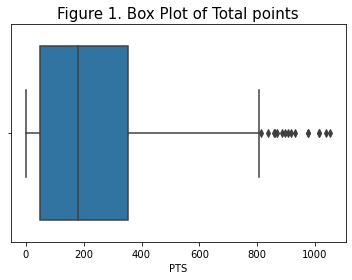

In [48]:
#box plot for the points:
# we can see the outliers for the highest points:
sns.boxplot(df_copy['PTS']).set_title('Figure 1. Box Plot of Total points', fontsize = 15)
plt.show()

## Task 2.2 
Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the 3P, 3PA and 3P% columns, but it is not sure which player's information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.


In [49]:
# Code goes after this line by adding cells


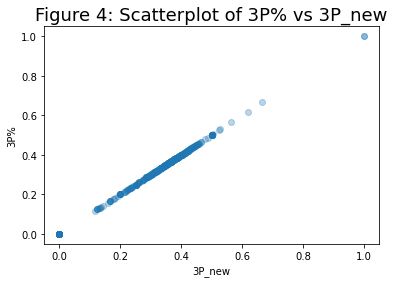

In [50]:
# here we basically take the given 3P% and then plot with our own calculated 3P% so
#if both of them are same we get astraight line as below
# this also validates that we have done our cleaning properly in the previous task.

threep_new = ((df_copy['3P']/df_copy['3PA']).round(3)).replace(np.nan,0)
plt.scatter(threep_new, df_copy['3P%'], alpha = 0.3);
plt.xlabel('3P_new');
plt.ylabel('3P%');
plt.title('Figure 4: Scatterplot of 3P% vs 3P_new', fontsize = 18);
plt.show();

## Task 2.3 
Please analyze the relationship between the player's total points and the rest features (columns). Please use at least three other columns.


In [51]:
# Code goes after this line by adding cells


Text(0, 0.5, 'PTS')

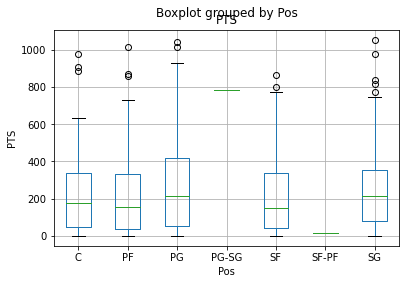

In [52]:
#Boxplot points in reguard to points
df_copy.dropna().boxplot(column='PTS',by='Pos')
plt.ylabel("PTS")

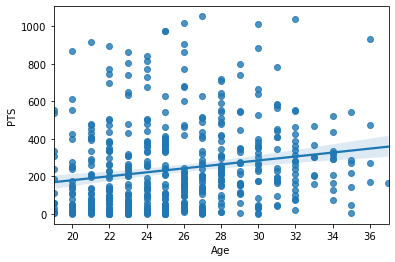

In [53]:
#regression graph age in reguard to points
import seaborn as sns
sns.regplot(x='Age',y='PTS',data=df_copy);

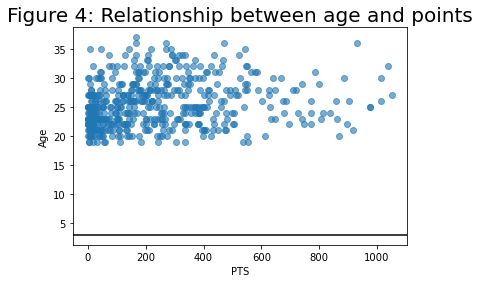

In [54]:
#Scatter plot age with points
plt.scatter(df_copy['PTS'], df_copy['Age'], alpha = 0.6);
plt.xlabel('PTS');
plt.ylabel('Age');
plt.title('Figure 4: Relationship between age and points', fontsize = 20);
plt.axhline(3, color='black')
plt.show();

Text(0.5, 0, 'PTS')

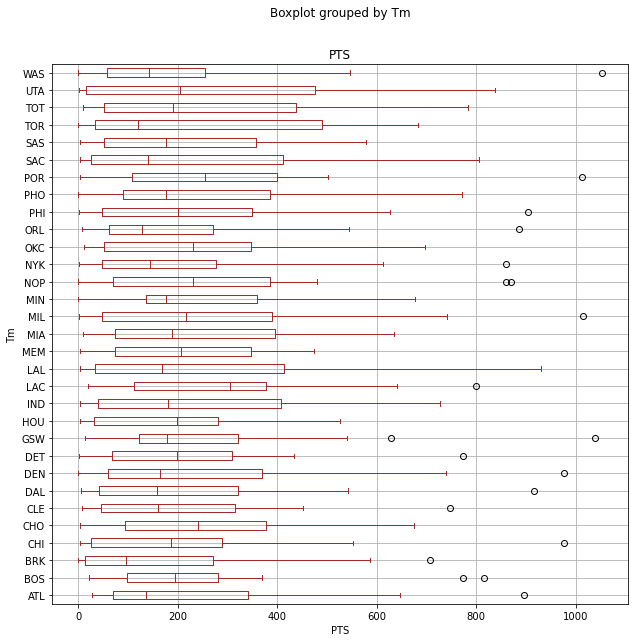

In [55]:
#Boxplot points with reguar to teams
df_copy.dropna().boxplot(column='PTS',by='Tm',vert=False,figsize=(10,10),color='brown')
plt.ylabel("Tm")
plt.xlabel("PTS")